In [1]:
import string
import re
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import log_loss
from sklearn.preprocessing import Imputer,LabelEncoder,OneHotEncoder
import matplotlib.ticker as ticker
from mpldatacursor import datacursor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib import cm
import matplotlib.pyplot as mt
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import HashingVectorizer

In [4]:
file ="./train.csv"
train = pd.read_csv(file, parse_dates=['Dates'])
test ="./test.csv"
test = pd.read_csv(file, parse_dates=['Dates'])
hour = train.Dates.dt.hour
train["Hour"]=hour
train["Month"]=train.Dates.dt.month
hour = test.Dates.dt.hour
test["Hour"]=hour
test["Month"]=test.Dates.dt.month
train.drop(columns=["Resolution"],axis=1,inplace=True)
test.drop(columns=["Resolution"],axis=1,inplace=True)
dataplot = train.copy()
# Cat = train.loc[:,["PdDistrict","Category"]]

f=train[train.Y==90]
f1 = train.groupby("Category")["Category"].count().sort_values(ascending=False)
f1=pd.DataFrame(f1)
f1.head(10)

Category
Category                
LARCENY/THEFT     172952
OTHER OFFENSES    124736
NON-CRIMINAL       91266
ASSAULT            75987
DRUG/NARCOTIC      53365
VEHICLE THEFT      53146
VANDALISM          44183
WARRANTS           41729
BURGLARY           36326
SUSPICIOUS OCC     31051

In [3]:
label=LabelEncoder()

# for i in range(len(train.columns)):
dataplot.loc[:,"Category"]=label.fit_transform(dataplot.loc[:,"Category"])
# Mapping of Category to its labels
CatLabel = dict(zip(label.classes_, label.transform(label.classes_)))

dataplot.loc[:,"DayOfWeek"]=label.fit_transform(dataplot.loc[:,"DayOfWeek"])

dataplot=dataplot[dataplot.Y!=90]
dataplot.head(2)
# train.head(5)
# dataplot.X.describe()

Dates  Category                          Descript  DayOfWeek  \
0 2013-06-28 17:40:00        27       FORCIBLE RAPE, BODILY FORCE          0   
1 2004-02-19 02:46:00        17  CONSUMING ALCOHOL IN PUBLIC VIEW          4   

  PdDistrict                   Address           X          Y      Id  Hour  \
0    MISSION  2100 Block of MISSION ST -122.419331  37.762264  141546    17   
1   SOUTHERN   1000 Block of MARKET ST -122.411340  37.781271  794152     2   

   Month  
0      6  
1      2

In [4]:

d = pd.Series([ x.replace('/','of') for x in train.Address.tolist() ])
d=pd.DataFrame([ x.split('of') for x in d.tolist()],columns=["Add1","Add2"])
train=pd.concat([train,d["Add1"],d["Add2"]],axis=1)
train.head(2)

Dates               Category  \
0 2013-06-28 17:40:00  SEX OFFENSES FORCIBLE   
1 2004-02-19 02:46:00            LIQUOR LAWS   

                           Descript DayOfWeek PdDistrict  \
0       FORCIBLE RAPE, BODILY FORCE    Friday    MISSION   
1  CONSUMING ALCOHOL IN PUBLIC VIEW  Thursday   SOUTHERN   

                    Address           X          Y      Id  Hour  Month  \
0  2100 Block of MISSION ST -122.419331  37.762264  141546    17      6   
1   1000 Block of MARKET ST -122.411340  37.781271  794152     2      2   

          Add1         Add2  
0  2100 Block    MISSION ST  
1  1000 Block     MARKET ST

In [5]:
kmeans = KMeans(n_clusters=36,max_iter=300)
df=pd.DataFrame(pd.concat([pd.DataFrame(train.X),pd.DataFrame(train.Y)],axis=1))
df = df[df.Y!=90]
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
fig = mt.figure(figsize=(5, 5))

# colors = map(lambda x: colmap[x+1], labels)

mt.scatter(df['X'], df['Y'], alpha=0.5,cmap=mt.get_cmap('jet'), edgecolor='k')
for idx, centroid in enumerate(centroids):
#     mt.scatter(*centroid, color=colmap[idx+1])
    mt.scatter(*centroid)
# mt.xlim(0, 80)
# mt.ylim(0, 80)
mt.show()

In [6]:
# cv = CountVectorizer(min_df=1)
# acv = cv.fit_transform(train["Address"]).toarray()
# tf = TfidfTransformer()
# atf = tfidf_transformer.fit_transform(acv)
# atf.shape()
# address_features=train["Address"].apply(lambda x: logodds[x])
# address_features.columns=["logodds"+str(x) for x in range(len(address_features.columns))]
# address_features
xy_scaler =preprocessing.StandardScaler()
xy_scaler.fit(train[["X","Y"]])
train[["X","Y"]]=xy_scaler.transform(train[["X","Y"]])
pca=PCA(2)  
train.loc[:,["X","Y"]]=pca.fit_transform(pd.DataFrame(train.loc[:,["X","Y"]]))


In [7]:
# vectorizer = HashingVectorizer(n_features=100)
# # encode document
# vector = vectorizer.transform(train.Address)
# vector.shape

In [8]:
# svd=TruncatedSVD(n_components=10, random_state=42)
# train["AddSVD"]=pd.DataFrame(svd.fit_transform(vector)).loc[:,1]


In [9]:
# sfimg = mpimg.imread('San Francisco.png') #importing map
Catlabel = pd.DataFrame(list(set(train["Category"])))
ax=dataplot.plot(kind='scatter', x='X', y='Y', alpha=0.5, s=dataplot["DayOfWeek"], 
             label= "Crime distribution across area", figsize=(13,9),c='Category', cmap=mt.get_cmap('jet'), 
             colorbar=True,)
ax.set_ylabel("Latitude", fontsize=14)
ax.set_xlabel("Longitude", fontsize=14)
# mt.imshow(sfimg, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.4)
# mt.ylabel("Latitude", fontsize=14)
# mt.xlabel("Longitude", fontsize=14)
# ax.legend(loc='right', bbox_to_anchor=(0.5, 1.1),ncol=6, fancybox=True, shadow=True)
mt.show()


In [10]:
PdD = list(set(dataplot.PdDistrict))
Cat=pd.get_dummies(train.Category)

In [11]:
dpd=pd.DataFrame(np.random.normal(0,1,(10,36)),columns=Cat.columns,index=PdD)
for p in PdD:
       for ca in Cat.columns:
                s="PdDistrict == '"+p+"' & Category == '"+ca+"'"
#                 print(s)
                d=train.query(s)  
                dpd.at[p,ca]=d.shape[0]
dpd.head(2)

ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
TARAVAL   118.0   5388.0        36.0     17.0    3421.0               161.0   
NORTHERN  147.0   8223.0        54.0     18.0    5778.0               448.0   

          DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  \
TARAVAL                         201.0         1509.0        255.0   
NORTHERN                        259.0         4463.0        365.0   

          EMBEZZLEMENT     ...       SECONDARY CODES  SEX OFFENSES FORCIBLE  \
TARAVAL           94.0     ...                 974.0                  380.0   
NORTHERN         131.0     ...                 985.0                  430.0   

          STOLEN PROPERTY  SUICIDE  SUSPICIOUS OCC  TRESPASS  VANDALISM  \
TARAVAL             229.0     58.0          2962.0     383.0     4804.0   
NORTHERN            695.0     67.0          3240.0     773.0     5348.0   

          VEHICLE THEFT  WARRANTS  WEAPON LAWS  
TARAVAL          6064.0    1593.0        557.0  
NORTHERN         6208.0    4538.0        778.0  

[2 rows x 36 columns]

In [12]:
dpd=pd.DataFrame(np.random.normal(0,1,(10,36)),columns=Cat.columns,index=PdD)
for p in PdD:
       for ca in Cat.columns:
                s="PdDistrict == '"+p+"' & Category == '"+ca+"'"
#                 print(s)
                d=train.query(s)  
                dpd.at[p,ca]=d.shape[0]
dpd.head(2)

ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
TARAVAL   118.0   5388.0        36.0     17.0    3421.0               161.0   
NORTHERN  147.0   8223.0        54.0     18.0    5778.0               448.0   

          DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  \
TARAVAL                         201.0         1509.0        255.0   
NORTHERN                        259.0         4463.0        365.0   

          EMBEZZLEMENT     ...       SECONDARY CODES  SEX OFFENSES FORCIBLE  \
TARAVAL           94.0     ...                 974.0                  380.0   
NORTHERN         131.0     ...                 985.0                  430.0   

          STOLEN PROPERTY  SUICIDE  SUSPICIOUS OCC  TRESPASS  VANDALISM  \
TARAVAL             229.0     58.0          2962.0     383.0     4804.0   
NORTHERN            695.0     67.0          3240.0     773.0     5348.0   

          VEHICLE THEFT  WARRANTS  WEAPON LAWS  
TARAVAL          6064.0    1593.0        557.0  
NORTHERN         6208.0    4538.0        778.0  

[2 rows x 36 columns]

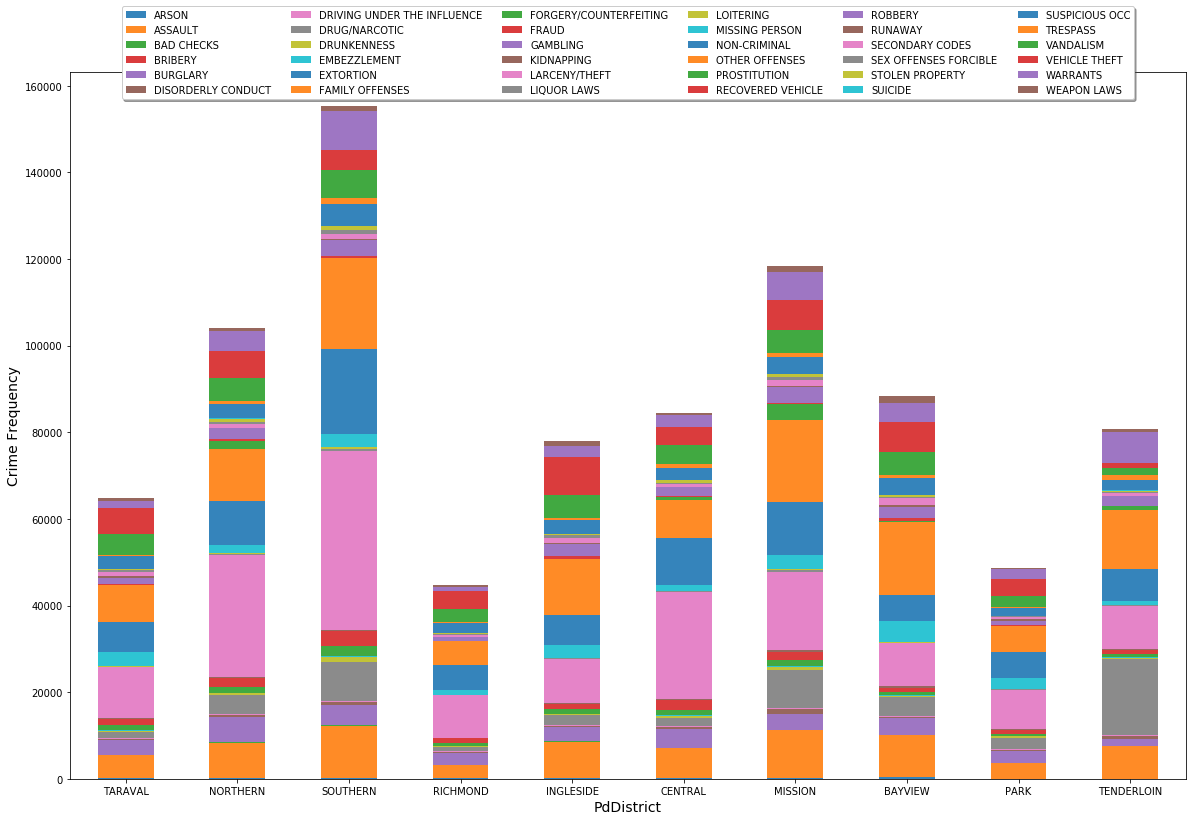

In [13]:
ax=dpd.plot(kind='bar',rot =0, figsize=(20,13),alpha=0.9,stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=6, fancybox=True, shadow=True)
# labels = PdD
# ax.set(xticks=range(9), xticklabels=labels, title='Hover over a bar')

mt.ylabel("Crime Frequency", fontsize=14)
mt.xlabel("PdDistrict", fontsize=14)
mt.show()

In [14]:
Hr = list(set(dataplot.Hour))
dhr=pd.DataFrame(np.random.normal(0,1,(24,36)),columns=Cat.columns,index=Hr)
for h in Hr:
       for ca in Cat.columns:
                s="Hour == "+str(h)+" & Category == '"+ca+"'"
#                 print(s)
                d=train.query(s)  
                dhr.at[h,ca]=d.shape[0] 
dhr.head(2)

ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0  100.0   4241.0        64.0     16.0    1342.0               233.0   
1   86.0   3745.0         1.0      9.0     821.0               176.0   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  EMBEZZLEMENT  \
0                        296.0         1688.0        367.0         238.0   
1                        269.0         1025.0        344.0           7.0   

      ...       SECONDARY CODES  SEX OFFENSES FORCIBLE  STOLEN PROPERTY  \
0     ...                 547.0                  547.0            215.0   
1     ...                 326.0                  217.0            157.0   

   SUICIDE  SUSPICIOUS OCC  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  \
0     19.0          2003.0     214.0     2645.0         2013.0    1658.0   
1     22.0           834.0     153.0     1809.0         1376.0    1191.0   

   WEAPON LAWS  
0        408.0  
1        318.0  

[2 rows x 36 columns]

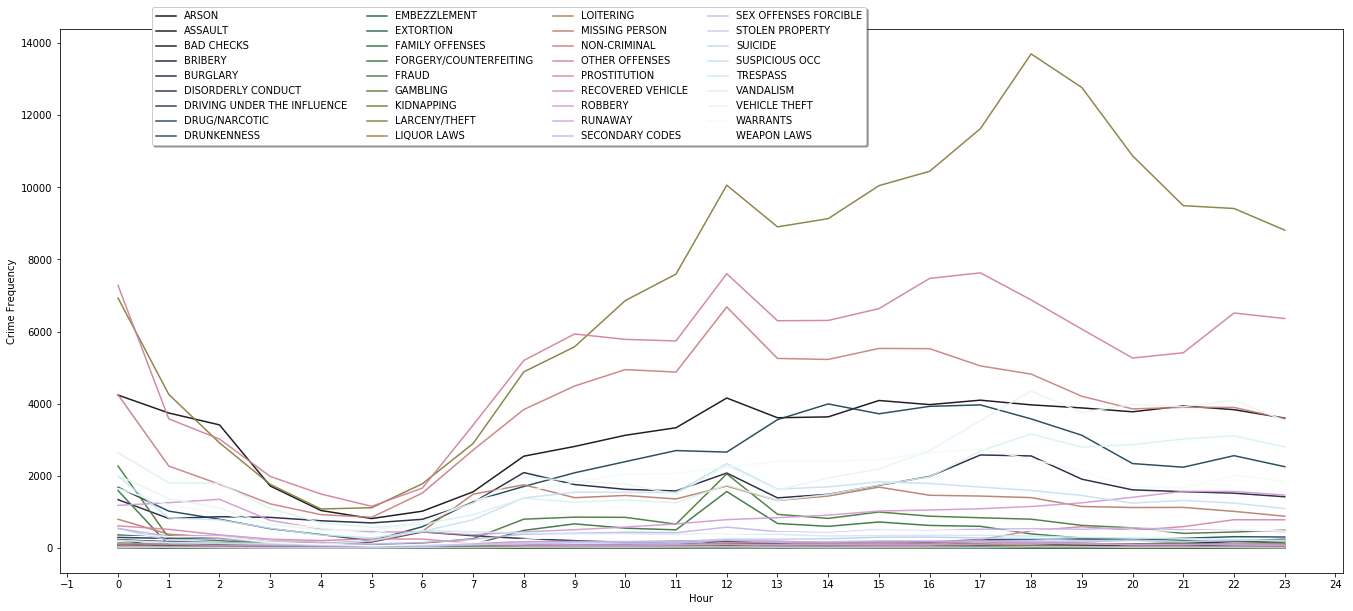

In [15]:
# d3.plot(kind='hist', figsize=(23,10), stacked=True, bins=20)
ax=dhr.plot( figsize=(23,10),legend=False,alpha=0.9,colormap=cm.cubehelix)
ax.set_ylabel("Crime Frequency")
ax.set_xlabel("Hour")
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(loc='upper center', bbox_to_anchor=(0.35, 1.05),
          ncol=4, fancybox=True, shadow=True)

mt.show()


In [16]:
mh = np.array([28,810,1016,1621,212])
dmh=pd.DataFrame(np.random.normal(0,1,(5,36)),columns=Cat.columns,index=mh)
for h in mh:
       for ca in Cat.columns:
                if(h == 28 ): s="Hour >=2 & Hour<=8 & Category == '"+ca+"'"
                if(h == 810): s="Hour >8 & Hour<=10 & Category == '"+ca+"'"
                if(h == 1016 ): s="Hour>10 & Hour<=16 & Category == '"+ca+"'"
                if(h == 1621): s="Hour>16 & Hour<=21 & Category == '"+ca+"'"
                if(h== 212): s="(Hour>21 or Hour<2) & Category == '"+ca+"'"
#                 print(s)
                d=train.query(s)  
                dmh.at[h,ca]=d.shape[0] 
# dmh
# s="Hour >21 or Hour<2 & Category == 'ARSON'"
# d=dhr['ARSON'].query(s)
# d.count


In [17]:
ax=dmh.plot(kind='bar',rot =0, figsize=(20,13),alpha=0.9,stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=6, fancybox=True, shadow=True)
# labels = PdD
# ax.set(xticks=range(9), xticklabels=labels, title='Hover over a bar')

mt.ylabel("Crime Frequency", fontsize=14)
mt.xlabel("Modified Hour", fontsize=14)
mt.show() 


In [18]:

Week = list(set(train.DayOfWeek))
dw=pd.DataFrame(np.random.normal(0,1,(7,36)),columns=Cat.columns,index=Week)
for w in Week:
       for ca in Cat.columns:
                s="DayOfWeek == '"+w+"' & Category == '"+ca+"'"
#                 print(s)
                d=train.query(s)  
                dw.at[w,ca]=d.shape[0] 

# max(dw.loc['Saturday':])


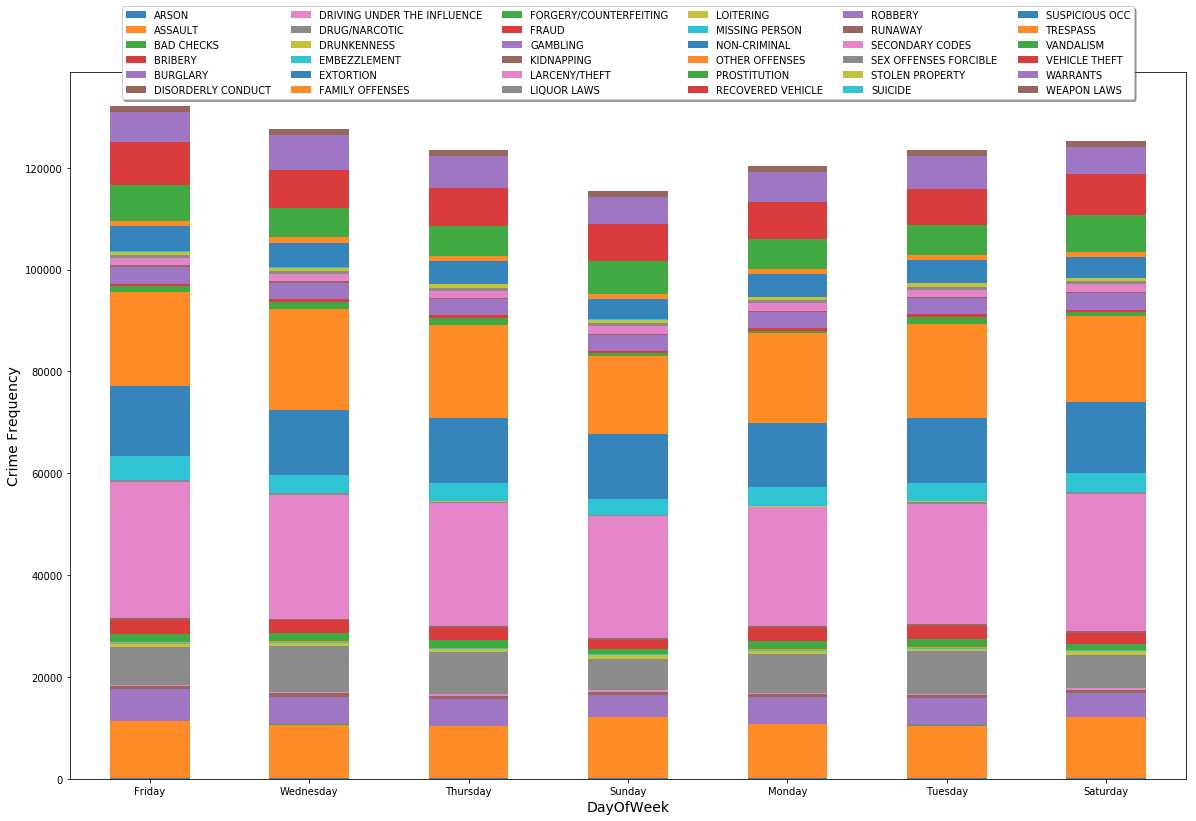

In [19]:
ax=dw.plot(kind='bar',rot =0, figsize=(20,13),alpha=0.9,stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=6, fancybox=True, shadow=True)
# labels = PdD
# ax.set(xticks=range(9), xticklabels=labels, title='Hover over a bar')

mt.ylabel("Crime Frequency", fontsize=14)
mt.xlabel("DayOfWeek", fontsize=14)
mt.show()

In [20]:
lmon=list(set(train.Dates.dt.month))
dmon=pd.DataFrame(np.random.normal(0,1,(12,36)),columns=Cat.columns,index=lmon)
for p in lmon:
       for ca in Cat.columns:
                s="Month == "+str(p)+" & Category == '"+ca+"'"
                d=train.query(s)  
                dmon.at[p,ca]=d.shape[0]
dmon.head(2)

ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
1  145.0   6154.0        37.0     27.0    3002.0               381.0   
2  119.0   6037.0        21.0     23.0    2809.0               361.0   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  EMBEZZLEMENT  \
1                        186.0         4842.0        337.0          96.0   
2                        186.0         4801.0        322.0          81.0   

      ...       SECONDARY CODES  SEX OFFENSES FORCIBLE  STOLEN PROPERTY  \
1     ...                 819.0                  360.0            386.0   
2     ...                 819.0                  330.0            366.0   

   SUICIDE  SUSPICIOUS OCC  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  \
1     37.0          2549.0     626.0     3559.0         4205.0    3785.0   
2     29.0          2453.0     579.0     3361.0         3991.0    3672.0   

   WEAPON LAWS  
1        656.0  
2        708.0  

[2 rows x 36 columns]

In [21]:
ax=dmon.plot(kind='bar',rot =0, figsize=(20,13),alpha=0.9,stacked=True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=6, fancybox=True, shadow=True)
# labels = PdD
# ax.set(xticks=range(9), xticklabels=labels, title='Hover over a bar')

mt.ylabel("Crime Frequency", fontsize=14)
mt.xlabel("Month", fontsize=14)
mt.show() 
